### Regression models to predict US open price:

Linear Regression - Mean Squared Error: 0.9495, R^2 Score: 0.9913
Decision Tree Regressor - Mean Squared Error: 2.0913, R^2 Score: 0.9809
Random Forest Regressor - Mean Squared Error: 1.4743, R^2 Score: 0.9866
Gradient Boosting Regressor - Mean Squared Error: 1.6789, R^2 Score: 0.9847


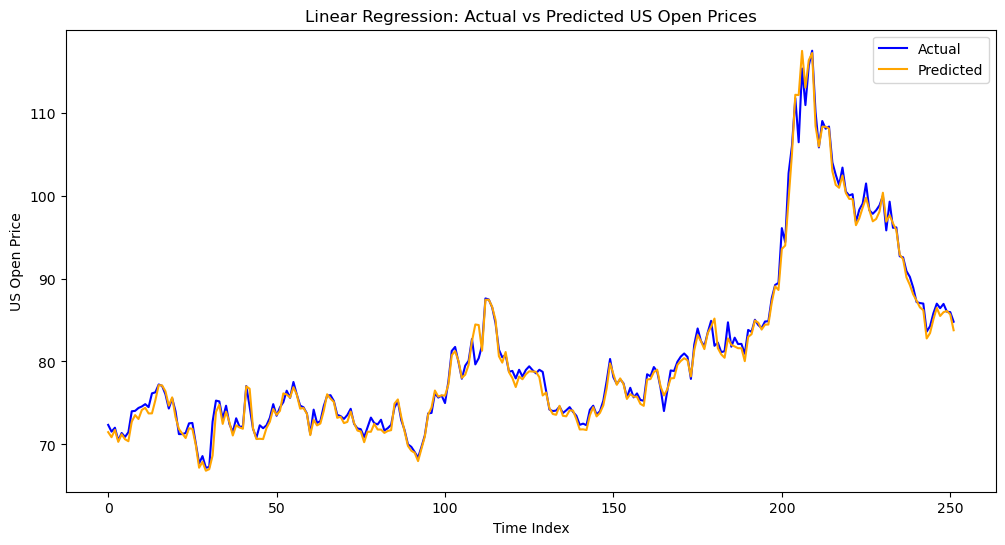

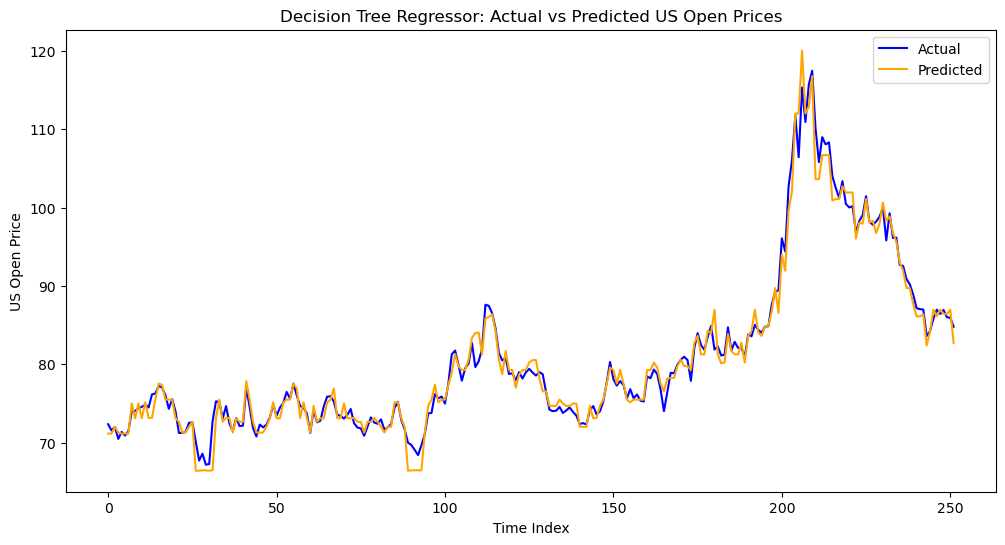

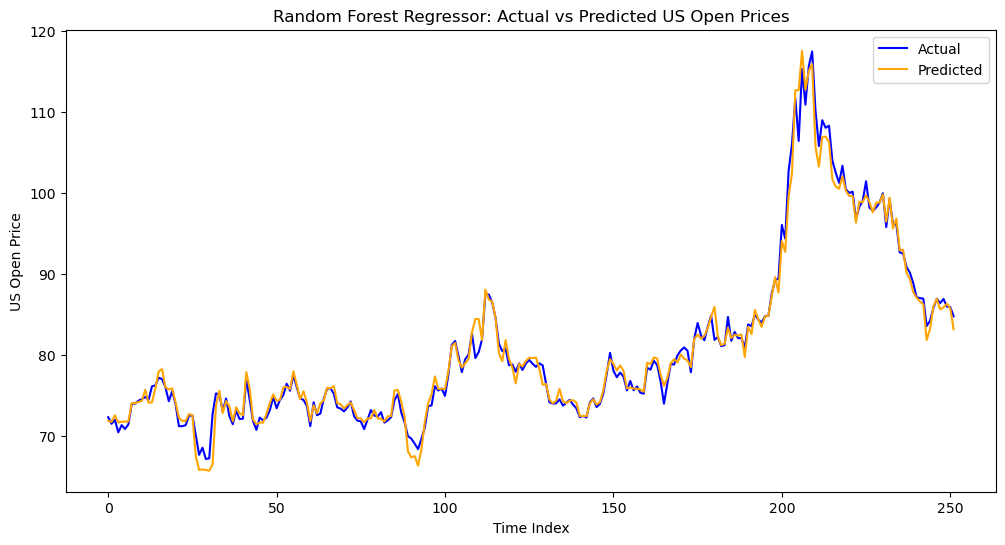

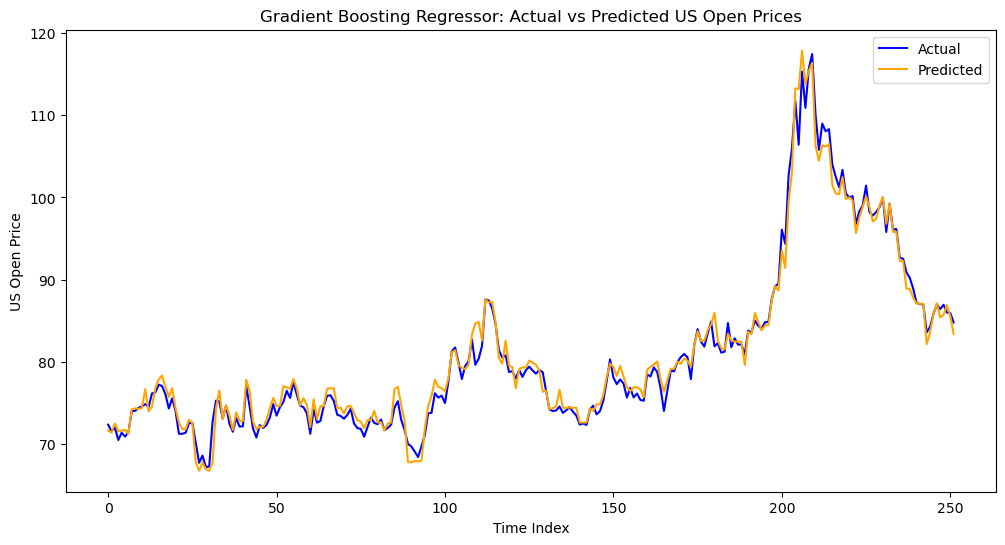

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the PCA CSV file into a DataFrame
df = pd.read_csv('pca_stock_data.csv')

# Features and target
X = df.drop(columns=['US_Open'])
y = df['US_Open']

# Sequential train-test split: first 80% for training, rest for testing
train_size = int(0.8 * len(X))
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse:.4f}, R^2 Score: {r2:.4f}")
    return y_pred

# Linear Regression
linear_model = LinearRegression()
y_pred_lr = evaluate_model(linear_model, X_train, X_test, y_train, y_test, "Linear Regression")

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=45)
y_pred_dt = evaluate_model(dt_model, X_train, X_test, y_train, y_test, "Decision Tree Regressor")

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=45)
y_pred_rf = evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest Regressor")

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=45)
y_pred_gb = evaluate_model(gb_model, X_train, X_test, y_train, y_test, "Gradient Boosting Regressor")

# Plot actual vs predicted values for each model
models_predictions = {
    "Linear Regression": y_pred_lr,
    "Decision Tree Regressor": y_pred_dt,
    "Random Forest Regressor": y_pred_rf,
    "Gradient Boosting Regressor": y_pred_gb
}

for model_name, y_pred in models_predictions.items():
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.values, label='Actual', color='blue')
    plt.plot(y_pred, label='Predicted', color='orange')
    plt.xlabel('Time Index')
    plt.ylabel('US Open Price')
    plt.title(f"{model_name}: Actual vs Predicted US Open Prices")
    plt.legend()
    plt.show()


### Trading performance for different regression models (using our trading simulator class):


=== Linear Regression Results ===

=== Trading Performance Summary ===
Initial Cash: 100000.00
Final Portfolio Value: 100483.20
Portfolio Growth: 0.48%
Total Buys: 8, Total Sells: 8
-----------------------------------



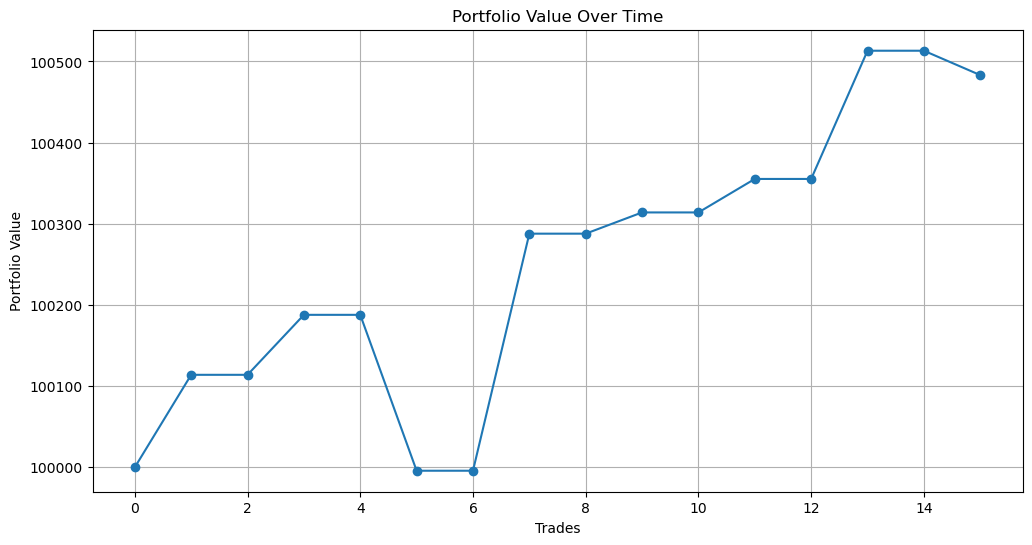

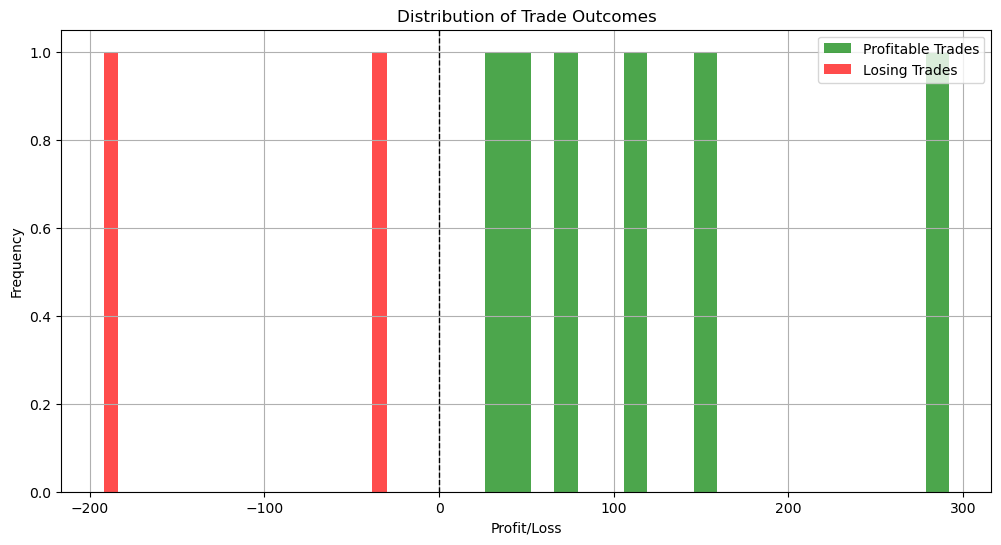


=== Performance Metrics ===
Total Profit: 483.20
Total Trades: 8
Win Rate: 75.00%
----------------------------


=== Decision Tree Regressor Results ===

=== Trading Performance Summary ===
Initial Cash: 100000.00
Final Portfolio Value: 99733.32
Portfolio Growth: -0.27%
Total Buys: 103, Total Sells: 103
-----------------------------------



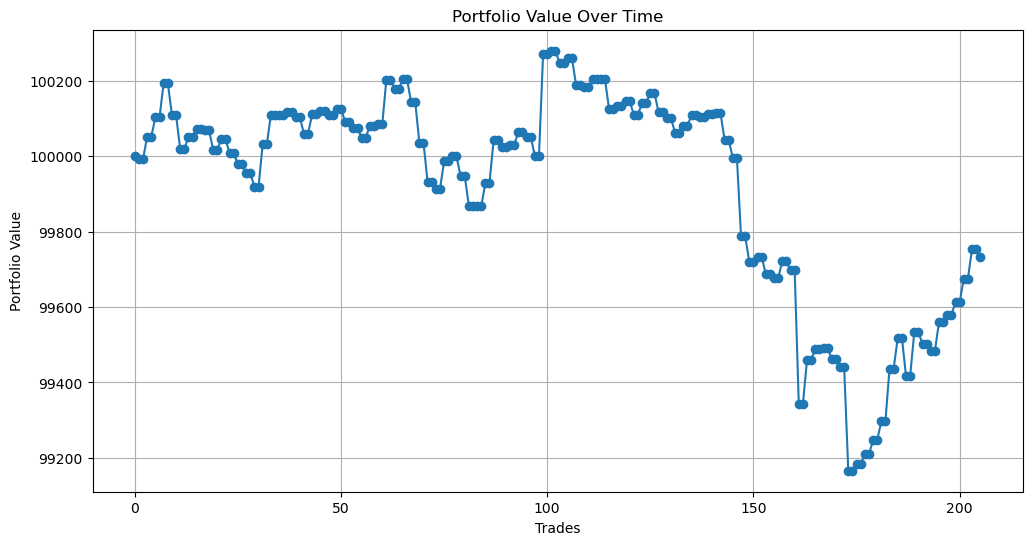

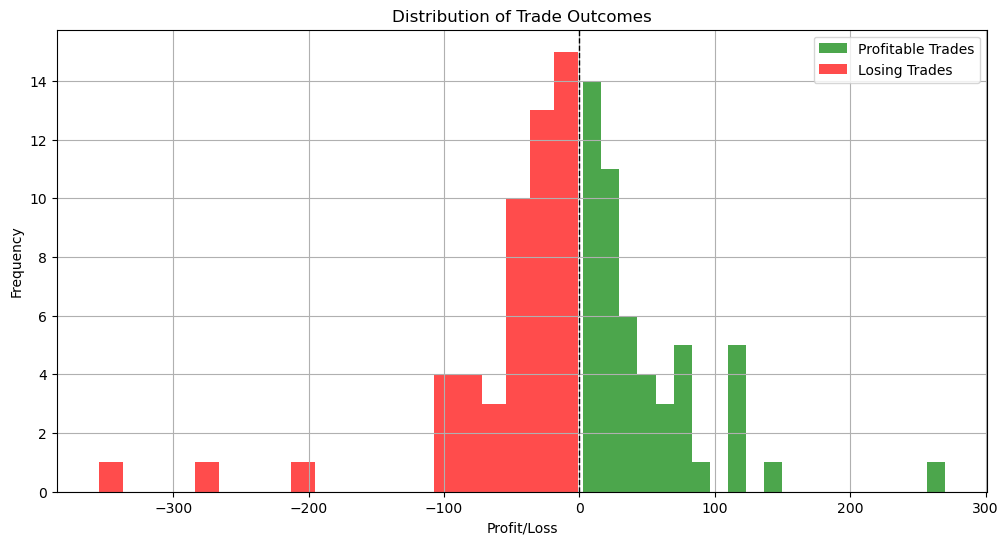


=== Performance Metrics ===
Total Profit: -266.68
Total Trades: 103
Win Rate: 49.51%
----------------------------


=== Random Forest Regressor Results ===

=== Trading Performance Summary ===
Initial Cash: 100000.00
Final Portfolio Value: 99947.74
Portfolio Growth: -0.05%
Total Buys: 122, Total Sells: 122
-----------------------------------



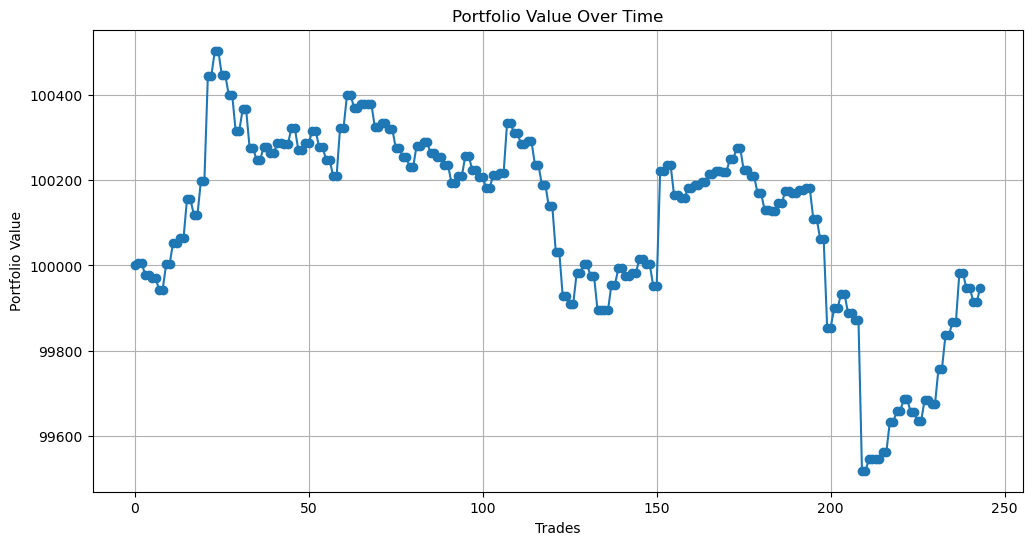

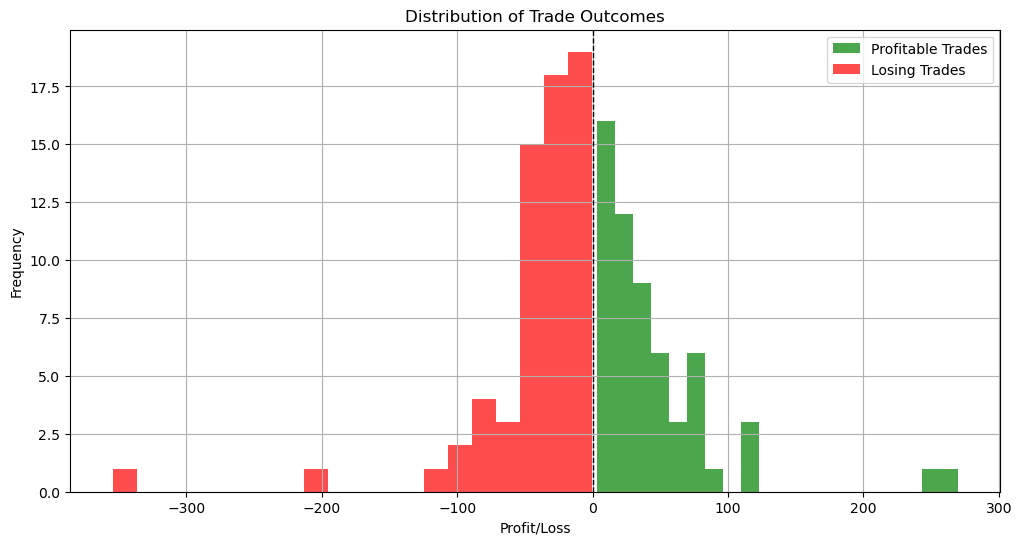


=== Performance Metrics ===
Total Profit: -52.26
Total Trades: 122
Win Rate: 47.54%
----------------------------


=== Gradient Boosting Regressor Results ===

=== Trading Performance Summary ===
Initial Cash: 100000.00
Final Portfolio Value: 97799.74
Portfolio Growth: -2.20%
Total Buys: 153, Total Sells: 153
-----------------------------------



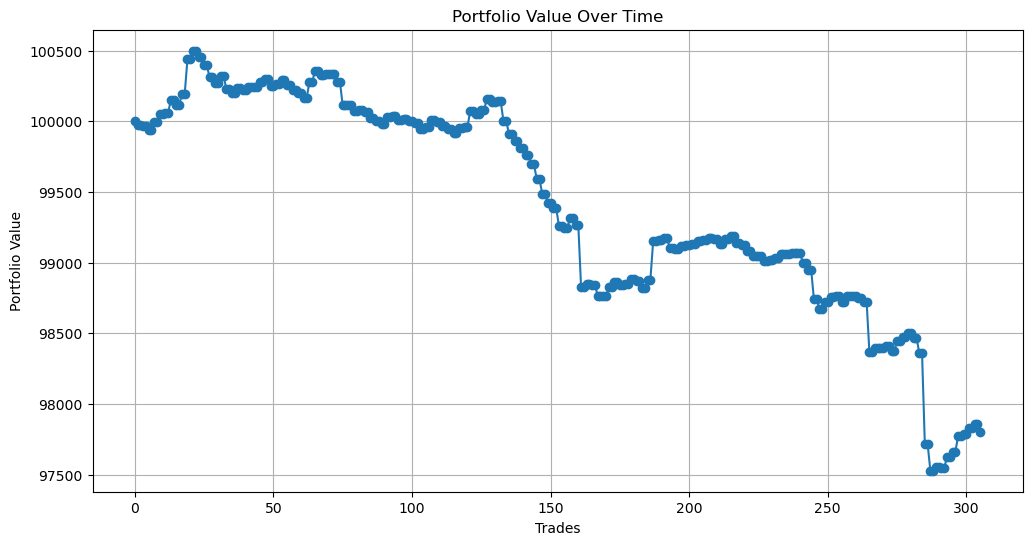

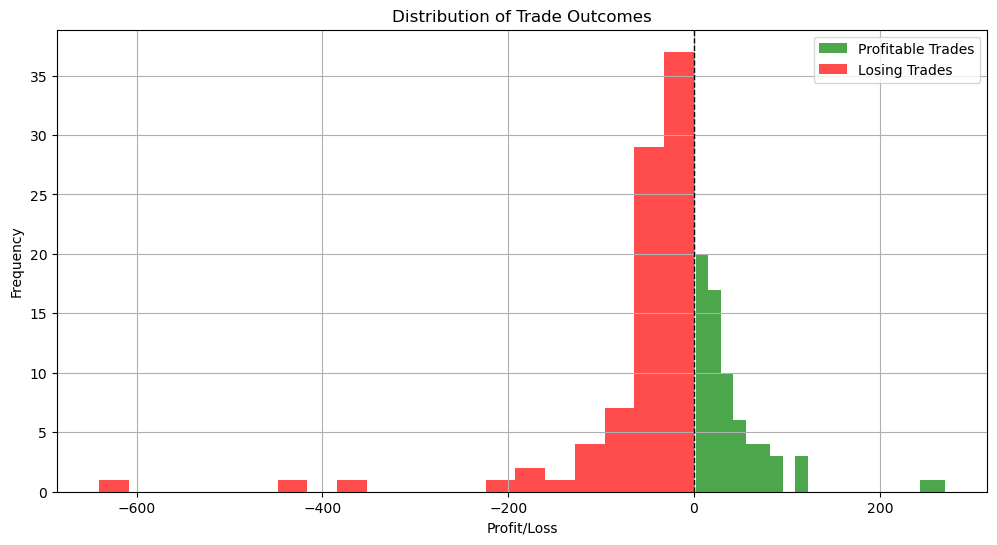


=== Performance Metrics ===
Total Profit: -2200.26
Total Trades: 153
Win Rate: 45.10%
----------------------------

Trade Log for Linear Regression:
  Action       Price  Quantity  Profit/Loss  Portfolio Value
0    BUY   76.820514       100     0.000000    100000.000000
1   SELL   77.959999       100   113.948470    100113.948470
2    BUY   93.641029       100     0.000000    100113.948470
3   SELL   94.379997       100    73.896848    100187.845318
4    BUY  112.820513       100     0.000000    100187.845318
5   SELL  110.900002       100  -192.051129     99995.794189
6    BUY  107.179487       100     0.000000     99995.794189
7   SELL  110.099998       100   292.051129    100287.845318
8    BUY  105.538463       100     0.000000    100287.845318
9   SELL  105.800003       100    26.153995    100313.999313


Trade Log for Decision Tree Regressor:
  Action      Price  Quantity  Profit/Loss  Portfolio Value
0    BUY  70.564106       100     0.000000    100000.000000
1   SELL  70.48999

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from TradingSimulator import TradingSimulator

# Use data from the first cell
# X_train, X_test, y_train, y_test are already created in the first cell

# Use already trained models and predictions from the first cell
models_predictions = {
    "Linear Regression": y_pred_lr,
    "Decision Tree Regressor": y_pred_dt,
    "Random Forest Regressor": y_pred_rf,
    "Gradient Boosting Regressor": y_pred_gb
}

# Function to generate trading signals based on predicted and actual values
def generate_signals(hk_close, us_open_pred, threshold=0.001):
    # Create DataFrame with actual HK close and predicted US open values
    signals = pd.DataFrame({'HK_Close': hk_close, 'US_Open_Pred': us_open_pred})
    
    def determine_signal(row):
        hk_close = row['HK_Close']
        us_open_pred = row['US_Open_Pred']
        
        # Calculate percentage difference
        percent_diff = (us_open_pred - hk_close) / hk_close
        
        if percent_diff > threshold:  # If predicted US Open > HK Close + threshold
            return 1  # Buy at HK Close, sell at US Open
        elif percent_diff < -threshold:  # If predicted US Open < HK Close - threshold
            return -1  # Sell at HK Close, buy back at US Open
        else:
            return 0  # Hold

    signals['signal'] = signals.apply(determine_signal, axis=1)
    return signals

# Test each model with the TradingSimulator
results = {}

for model_name, y_pred in models_predictions.items():
    # Generate signals based on HK close and predicted US open
    hk_close = X_test['HK_Close'].values  # Assuming 'HK_Close' is a column in the dataset
    us_open_pred = y_pred
    signals = generate_signals(hk_close, us_open_pred)
    
    # Combine signals with test data
    df_test = pd.DataFrame()  # Creating df_test here for use with the simulator
    df_test['US_Open'] = y_test.values  # Using the actual test target values
    df_test['HK_Close'] = hk_close
    df_test['signal'] = signals['signal']
    
    # Initialize and run the simulator
    simulator = TradingSimulator(initial_cash=100000, transaction_fee=0.001)
    simulator.run(df_test, hk_close_column='HK_Close', us_open_column='US_Open', signal_column='signal',instant_sell=False)
    
    # Get results and store them
    final_portfolio_value = simulator.get_portfolio_value(df_test['US_Open'].iloc[-1])
    trade_log = simulator.get_trade_log()
    results[model_name] = {
        "Simulator": simulator,  # Store the simulator instance for accessing methods later
        "Final Portfolio Value": final_portfolio_value,
        "Trade Log": trade_log
    }
    
    # Print summary and plot portfolio growth
    print(f"\n=== {model_name} Results ===")
    simulator.summary(df_test['US_Open'].iloc[-1])
    simulator.plot_portfolio_growth()
    simulator.plot_trade_outcomes()
    simulator.calculate_metrics()

# Optional: Display trade logs for each model
for model_name, result in results.items():
    print(f"Trade Log for {model_name}:")
    print(result["Trade Log"].head(10))  
    print("\n")
    
